# 1

1a.) A classification decision tree is a type of machine learning algorithm. It is used to predict the categorial label of an input by using the training data. The goal of the tree is to ultimately create a homogenous group after subsplitting the data many times. 

Classification decision trees are useful when you need to categorize inputs based on distinct classes, when you want to analyze both numerical and categorical features, or when there is a non-linear decision boundary present in your data. 

Some example scenarios where classification decision trees may be useful are: 

-Diagnosing diseases using different health metrics 

-Credit scoring (analyzing whether a client is high risk or low risk)

-Spam filtering (analyzing whether a message is spam or not)

1b.) A classification decision tree outputs a categorical label or class probability, and makes this prediction by traversing a tree to assign a class outcome. It utilizes a non-linear decision boundary. Ont the other hand, Multiple Linear Regression outputs a continuous numerical value, and makes this prediction by computing a weighted sum of inputs. It utilizes a linear decision boundary. Overall, a classification decision tree solves classification problems where you want to predict a categorical label. A multiple linear regression predicts a numerical value based on the inputs. 

# 2 

2.1) Weather predictions could use accuracy as a metric, as the goal of weather predictions is to maximize the amount of correct predictions made. Moreover, the cost of making an incorrect prediction is not too impactful (i.e bringing an umbrella when unnecessary). 

2.2) Medical diagnostics can use sensitivity as a metric, as missing a positive case has much worse consequences than making a false positive prediction. This way we can ensure that most positive cases are identified and treatment is administered. 

2.3) Spam email detection can use specificty as a metric, because it is essential that actual non-spam important emails are not incorrectly classified as spam, which can lead to miscommunication or missed opportunities for the user. 

2.4) Online advertising can use precision as a metric, as this way advertisers can ensure that they are showing their ads to users who will actually engage with it. 

# 3 

In [11]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Remove specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN values and create a copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert 'Pub year' and 'NumPages' to integers
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)

# Convert 'Hard_or_Paper' to categorical type
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")


# 4 

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in the training and test sets
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the testing set: {len(ab_reduced_noNaN_test)}")


Number of observations in the training set: 255
Number of observations in the testing set: 64


The first step is creating the target variable y. It refers to the converted categorical Hard_or_Paper column that is converted into one_hot encoed format. Each category in Hard_or_Paper ("hard," "paper") is represented by either a 0 or 1. The ['H'] selects the "hard" column, which means that the variable results in 1 when the book is a hardcopy, and 0 when it is not (paper). 

The second step creates an input variable x that represents the "List Price" column. This means that the DecisionTreeClassifier will use "ListPrice" to predict whether a book is hardcopy or paperback. 

In [6]:
from sklearn.tree import DecisionTreeClassifier

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Instantiate the model with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using the List Price as the feature (X) and the 'Hard_or_Paper' as the target (y)
clf.fit(X, y)

# Print the trained decision tree
from sklearn.tree import export_text
print(export_text(clf, feature_names=['List Price']))


|--- List Price <= 17.97
|   |--- List Price <= 10.80
|   |   |--- class: False
|   |--- List Price >  10.80
|   |   |--- class: False
|--- List Price >  17.97
|   |--- List Price <= 29.23
|   |   |--- class: True
|   |--- List Price >  29.23
|   |   |--- class: False



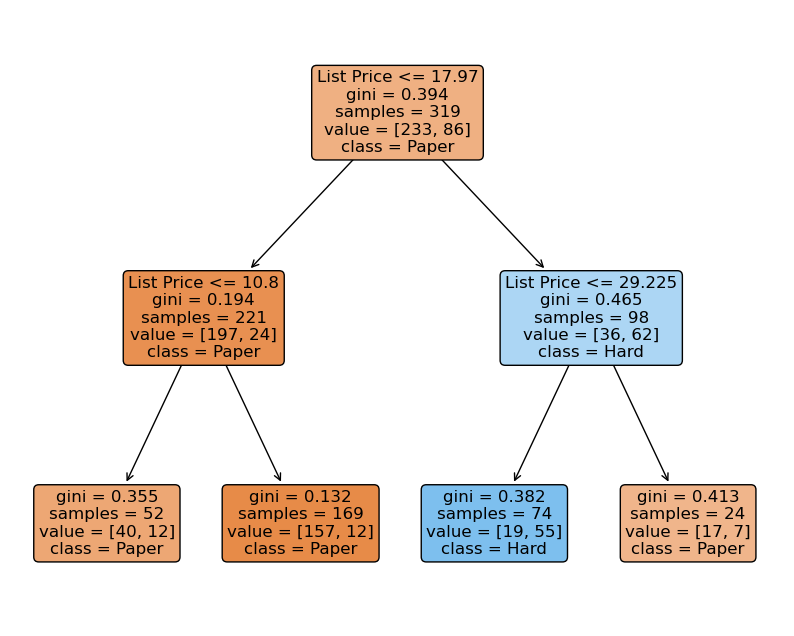

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paper', 'Hard'], rounded=True, fontsize=12)

# Display the plot
plt.show()


# 5

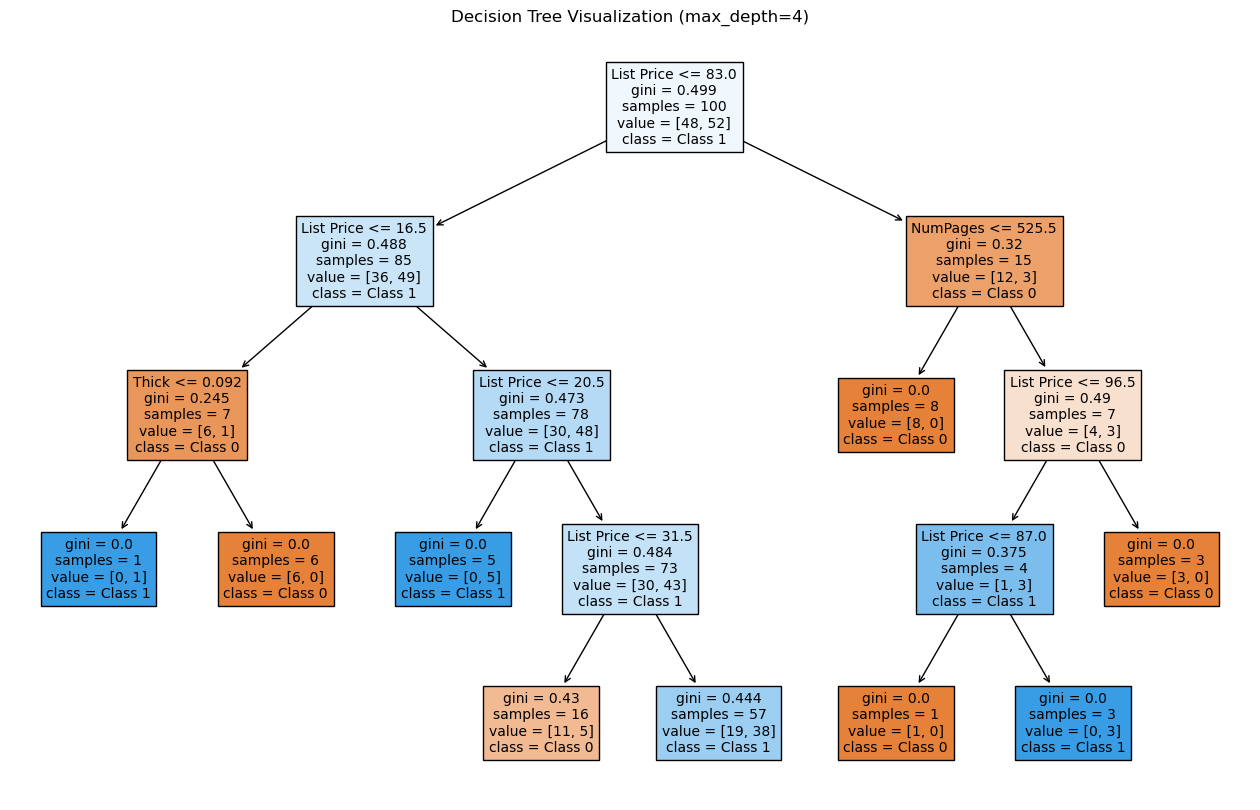

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

# Simulate a dataset resembling the structure of ab_reduced_noNaN for demonstration
np.random.seed(42)
data = {
    'NumPages': np.random.randint(50, 1000, 100),
    'Thick': np.random.rand(100) * 5,
    'List Price': np.random.randint(10, 100, 100),
    'Target': np.random.choice([0, 1], 100)  # Binary classification target
}

# Convert to DataFrame
ab_reduced_noNaN = pd.DataFrame(data)

# Features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = ab_reduced_noNaN['Target']

# Train a Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(clf2, feature_names=X.columns, class_names=["Class 0", "Class 1"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()


The Decision Tree uses the features NumPages, Thick, List Price to predict whether a book is hard cover or not. This works by evaluating certain conditions at each node, and sorting the data based on whether it met that condition or not. This process continues until a leaf node is met, where a final prediction is made (whether it is hard cover/paper). Since the tree is limited to a depth level of 4, there is 4 decision levels. 

# 6 

In [20]:
# Make predictions for both models using the test set
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# For clf (the first model trained with 'List Price')
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Only use 'List Price' for clf
y_pred_clf = clf.predict(X_test_clf)

# For clf2 (the second model trained with 'NumPages', 'Thick', 'List Price')
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Use all 3 features for clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Generate confusion matrices for both models
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Calculate Sensitivity, Specificity, and Accuracy for clf
TP_clf = conf_matrix_clf[1, 1]  # True Positives
TN_clf = conf_matrix_clf[0, 0]  # True Negatives
FP_clf = conf_matrix_clf[0, 1]  # False Positives
FN_clf = conf_matrix_clf[1, 0]  # False Negatives

# Sensitivity (Recall) for clf
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
# Specificity for clf
specificity_clf = TN_clf / (TN_clf + FP_clf)
# Accuracy for clf
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# Calculate Sensitivity, Specificity, and Accuracy for clf2
TP_clf2 = conf_matrix_clf2[1, 1]
TN_clf2 = conf_matrix_clf2[0, 0]
FP_clf2 = conf_matrix_clf2[0, 1]
FN_clf2 = conf_matrix_clf2[1, 0]

# Sensitivity (Recall) for clf2
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
# Specificity for clf2
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
# Accuracy for clf2
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Report the results
print("For clf model:")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}\n")

print("For clf2 model:")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")


For clf model:
Sensitivity: 0.8500
Specificity: 0.9091
Accuracy: 0.8906

For clf2 model:
Sensitivity: 0.3000
Specificity: 0.8409
Accuracy: 0.6719


ChatGPT conversation for Q1-6: https://chatgpt.com/share/673c13f7-b7a0-8011-a5a9-15b2b49af69a

# 7 

The difference between the two confusion matrices arises from the fact that they use different sets of features to make the predictions. The first confusion matrix is solely trained on List Prices, while the second confusion matrix is trained on NumPages, Thick, and List Price. The second confusion matrix is more complex as it takes into account more features than the first confusion matrix, which could improve or worsen the classification performance of the model. The confusion matrices for clf and clf2 are better, since they are evaluated on test data, (i.e unseen data), which can avoid issues such as overfitting. 

# 8

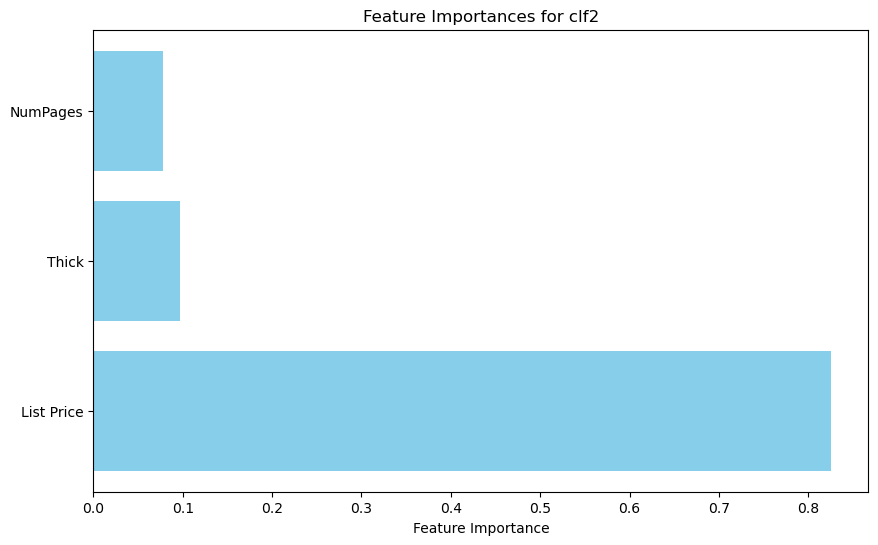

The most important feature for making predictions according to clf2 is: List Price


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances and the feature names from clf2
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Report the most important feature
most_important_feature = feature_names[np.argmax(importances)]
print(f"The most important feature for making predictions according to clf2 is: {most_important_feature}")


# 9

In linear model regression, the coefficients represent the direction and strength of the relationship between the outcome variable and the predictor variable. Negative coefficents represent a negative relationship between the two, and a larger coefficient can represent that the predictor variable has a larger influence on the outcome. On the other hand, feature importances show how important a feature is in reducing the impurity of each split. A higher feature importance value indiciates that the feature helps make better predictions and reduces the impurity as more splits are added. Moreover, unlike linear regression, decision tree feature importance does not imply a linear relationship. 

ChatGPT conversation for Q7-9: https://chatgpt.com/share/673c1d70-2440-8011-97b1-af39a2cddbd5